In [1]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.misc import electrocardiogram

In [2]:
ecg = electrocardiogram()

C:\Users\lelca\AppData\Local\Temp\ipykernel_21728\1006606182.py:1: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg = electrocardiogram()


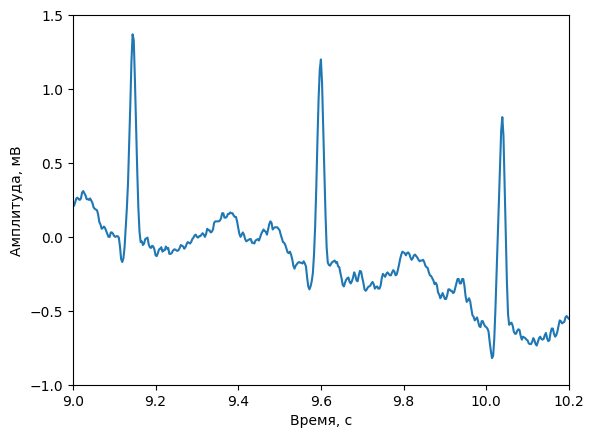

In [3]:
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)
plt.xlabel("Время, с")
plt.ylabel("Амплитуда, мВ")
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.show()

In [4]:
print(pywt.wavelist())

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [5]:
freq = np.linspace(1, fs/2, 2500)
width = 6*360 / (2*freq*np.pi)
coefs, freqs = pywt.cwt(ecg, width,'gaus1')

(-1.5, 1.5)

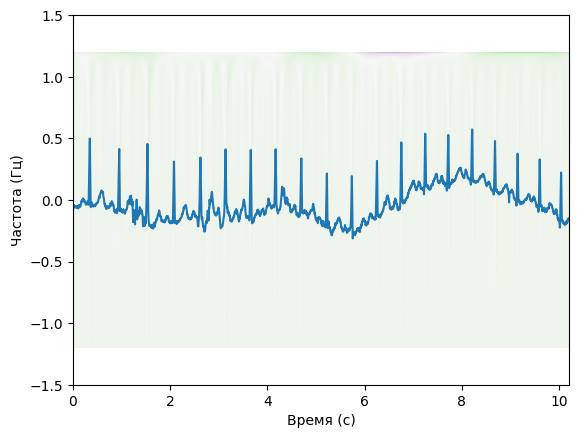

In [6]:
#Визуализация результатов CWT на графике

plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.imshow(coefs, extent=[0, time[ecg.size-1], -1.2, 1.2], cmap="PRGn", aspect="auto")
plt.plot(time, ecg / np.abs(ecg).max())
plt.xlim(0, 10.2)
plt.ylim(-1.5, 1.5)

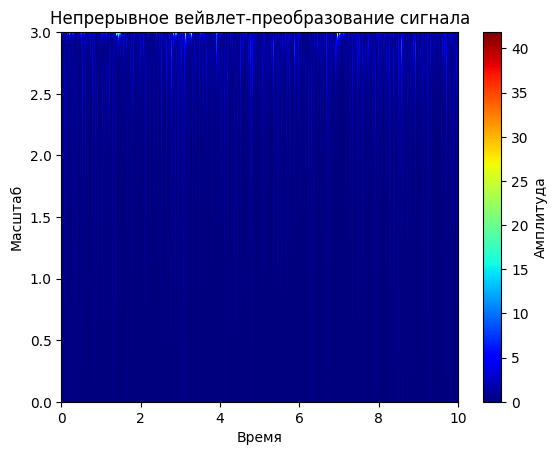

In [10]:
#Визуализация результатов CWT и амплитуд на изображении (без лимита по оси х)
coefs1, freqs1 = pywt.cwt(ecg, width, wavelet='gaus1')

plt.imshow(np.abs(coefs1), aspect='auto', cmap='jet', extent=[0, 10, 0, 3])
plt.colorbar(label="Амплитуда")
plt.ylabel("Масштаб")
plt.xlabel("Время")
plt.title("Непрерывное вейвлет-преобразование сигнала")
plt.show()

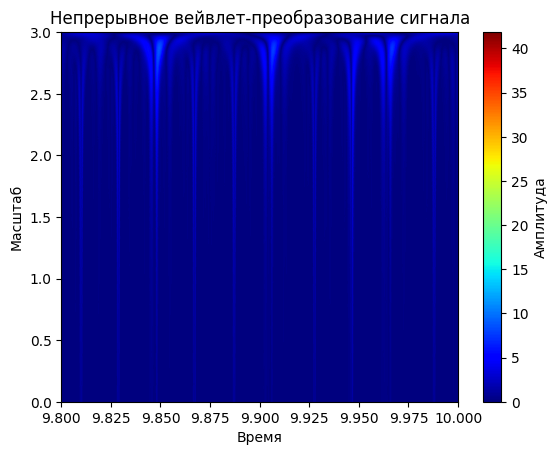

In [9]:
#Визуализация результатов CWT и амплитуд на изображении (с лимитом по оси х)
coefs1, freqs1 = pywt.cwt(ecg, width, wavelet='gaus1')

plt.imshow(np.abs(coefs1), aspect='auto', cmap='jet', extent=[0, 10, 0, 3])
plt.colorbar(label="Амплитуда")
plt.ylabel("Масштаб")
plt.xlabel("Время")
plt.title("Непрерывное вейвлет-преобразование сигнала")
plt.xlim(9.8, 10)
plt.show()